## Iris Flower Classification Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step1: Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv('/workspaces/IRIS-Deployment-Project/Notebook/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Step2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape

(150, 6)

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## There are no missing values nor any duplicates in iris dataset

## Separate X and Y features
X= sepal and petal length,widths
Y = Target feature=> Species

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
X  = df.drop(columns=["Id","Species"])
Y = df[["Species"]]

In [10]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


<Axes: xlabel='Species'>

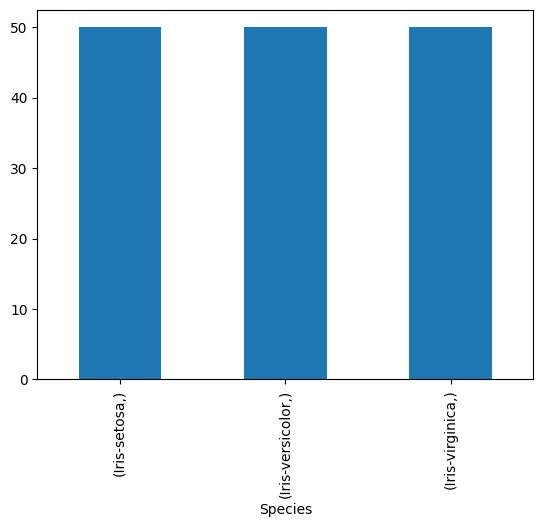

In [13]:
Y.value_counts().plot(kind='bar')

## Step4 : Apply Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75,random_state=42)

In [15]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5


In [16]:
xtest.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [17]:
ytrain.head()

,Species
4,Iris-setosa
32,Iris-setosa
142,Iris-virginica
85,Iris-versicolor
86,Iris-versicolor


In [18]:
ytest.head()

,Species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


## Build the model

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [20]:
model = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    LogisticRegression()
)
model.fit(xtrain,ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Evaluate the model

In [21]:
model.score(xtrain,ytrain)

0.9642857142857143

In [22]:
model.score(xtest,ytest)

1.0

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

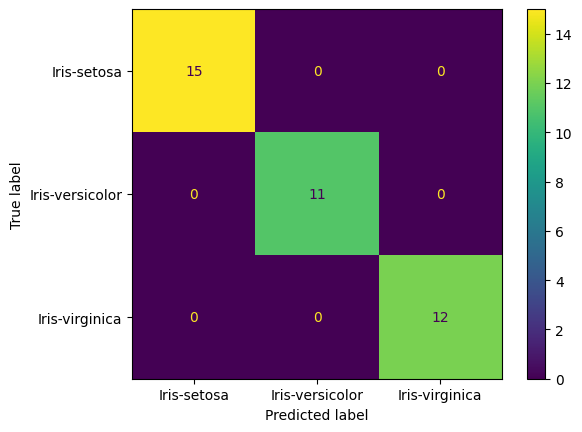

In [24]:
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [25]:
ypred_test = model.predict(xtest)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



## Cross validation - observe the results

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")

In [29]:
scores

array([0.95816993, 1.        , 0.85645933, 1.        , 0.95475113])

In [30]:
scores.mean()

np.float64(0.9538760792011566)

## Above model gives cross validation score greater than 0.80. Can consider this model for final predictions

## Save the model using joblib package

In [31]:
import joblib

In [32]:
joblib.dump(model,"model.joblib")

['model.joblib']